In [122]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

#neural network class definition

class neuralNetwork:
    
    #initialise the nueral network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        
        #set number of nodes in each input, hidden, outputlayer:
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #learnng rate
        self.lr = learningrate
        
        #link with matrices, wih and who
        #weights inside the arrays are w_i_J, where link is from node i to node j in the next layer

        self.wih = numpy.random.normal(0.0,pow(self.inodes,-0.5),(self.hnodes,self.inodes))
        self.who = numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.onodes,self.hnodes))

        #activation function is the sigmoid function
        self.activation_function = lambda x : scipy.special.expit(x)
        

    
   
    #train the neural network
    def train(self, inputs_list,targets_list):
        #convert inputs list and target list into 2d array
        inputs = numpy.array(inputs_list,ndmin=2).T
        targets = numpy.array(targets_list,ndmin=2).T
        
        #calculate signal in hidden layer
        hidden_inputs = numpy.dot(self.wih,inputs)
        #calculate the signal emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #calculate signal in output layer
        final_inputs = numpy.dot(self.who,hidden_outputs)
        #calculate the signal emerging from output layer
        final_outputs = self.activation_function(final_inputs)
        
        #calculate the error
        output_errors = targets - final_outputs 
        
        #calculate the error in hidden layers
        #inherent summation calculation
        hidden_errors = numpy.dot(self.who.T,output_errors)
        
        #update the weights for the link between the hidden layer and output layer
        self.who += self.lr *numpy.dot((output_errors*final_outputs*(1.0-final_outputs)),numpy.transpose(hidden_outputs))
        
        #update the weights for the link between the input layer and hidden layer
        self.wih += self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),numpy.transpose(inputs))
        
        
        
        
   

    #query the neural network
    def query(self, input_list):
        
        #convert inputs list to 2d array
        inputs = numpy.array(input_list,ndmin=2).T
        
        
        #input for hidden layers through input_hidden link with wih
        hidden_inputs = numpy.dot(self.wih,inputs)
        #calculate the signal emerging from hidden_layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #input for output layers through hidden_output link with who
        final_inputs = numpy.dot(self.who,hidden_outputs)
        #calculate the signal emerging from output
        final_outputs = self.activation_function(final_inputs)
       
        return final_outputs

In [123]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

#learning rate is 0.3
learning_rate = 0.1

#create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [124]:
# load the mnist training data csv file into a list
with open('mnist_dataset/mnist_train.csv','r') as training_data_file:
    training_data_list = training_data_file.readlines()
    


In [125]:
#train the neural network
epochs = 5
for e in range(epochs):
    
    #go through all records in the training dataset
    for record in training_data_list:
        #split the record by ','
        all_values = record.split(',')

        #scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    
        #create the target output values (all 0.01, except the desired label to be 0.99)
        targets = numpy.zeros(output_nodes)+0.01
    
        #all_values[0] is the target label which should be 0.99
        targets[int(all_values[0])] = 0.99
    
    
        n.train(inputs,targets)
    

In [126]:
# test the neural network
with open('mnist_dataset/mnist_test.csv','r') as test_data_file:
    test_data_list = test_data_file.readlines()


In [127]:
#scorecard for how well the network performs, initially empty
scorecard = []

#get the first test record in all the test data set
for record in test_data_list:
    test_all_values = record.split(',')
    #print the target value
    correct_label = int(test_all_values[0])
    print('correct label is',correct_label)
    
    #scale and shift the test data list
    inputs = (numpy.asfarray(test_all_values[1:])/255*0.99)+0.01
    #query the network
    outputs = n.query(inputs)
    #the index of highest values correspond to the label
    label = numpy.argmax(outputs)
    print('the networks answer is', label)
    
    #append correct or incorrect to list
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        

correct label is 7
the networks answer is 7
correct label is 2
the networks answer is 2
correct label is 1
the networks answer is 1
correct label is 0
the networks answer is 0
correct label is 4
the networks answer is 4
correct label is 1
the networks answer is 1
correct label is 4
the networks answer is 4
correct label is 9
the networks answer is 9
correct label is 5
the networks answer is 5
correct label is 9
the networks answer is 9
correct label is 0
the networks answer is 0
correct label is 6
the networks answer is 6
correct label is 9
the networks answer is 9
correct label is 0
the networks answer is 0
correct label is 1
the networks answer is 1
correct label is 5
the networks answer is 5
correct label is 9
the networks answer is 9
correct label is 7
the networks answer is 7
correct label is 3
the networks answer is 3
correct label is 4
the networks answer is 4
correct label is 9
the networks answer is 9
correct label is 6
the networks answer is 6
correct label is 6
the networks 

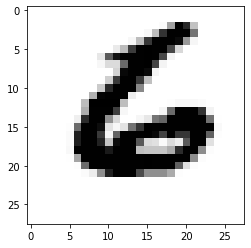

In [128]:
image_array = numpy.asfarray(test_all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap = 'Greys',interpolation = 'None')

In [129]:
#calculate the error rate with scorecard
score = numpy.asfarray(scorecard)
performance = score.sum()/score.size
print('the correct rate is',performance*100,'%')

the correct rate is 96.93 %
